# Customer Segmentation

## Background

This dataset contains all purchases made for an online retail company based in the UK during an eight month period. We could use cluster analysis combined with RFM analysis to do a customer segmentation.

## Prepare and Explore the Data

For this experiment, we will use [this](https://www.kaggle.com/vijayuv/onlineretail) data from Kaggle platform.

In [ ]:
# Package imports
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.max_rows', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
files_dir = "/content/drive/MyDrive/GreatEdu"
os.chdir(files_dir)

In [ ]:
df= pd.read_excel("data_online_retail.xlsx")

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df_backup = df.copy()
df_backup.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
len(df)

541909

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
df.loc[df['CustomerID'].isna()].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom


In [ ]:
#df.to_csv("Online_Retail.csv", index= False)

In [ ]:
print("Total data:", len(df))

Total data: 541909


In [ ]:
df[["Quantity", "UnitPrice"]].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [ ]:
weird_data = df[(df.Quantity <= 0) |( df.UnitPrice <= 0)]

In [ ]:
len(weird_data)

11805

Since we want to segment our customers, we have to make sure that `CustomerID` is not null.

In [ ]:
# Check missing value
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
135080 / 541909

0.249266943342886

We could see that there is missing value in `CustomerID` columns. We could remove those missing values.

In [ ]:
# Remove missing value
df = df[df["CustomerID"].notna()]
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Then we could do some descriptive statistic.

In [ ]:
# Simple descriptive statistic
df[["Quantity", "UnitPrice"]].describe()

,Quantity,UnitPrice
count,406829.000000,406829.000000
mean,12.061303,3.460471
std,248.693370,69.315162
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


Wait, hold on. How come the quantity is a negative number and the unit price is zero? Let's check it.

In [ ]:
# Check anomaly data
quantity_zero = len(df[df["Quantity"] <= 0])
perc_quantity_zero = (len(df[df["Quantity"] <= 0]) / len(df)) * 100
unitprice_zero = len(df[df["UnitPrice"] == 0])
perc_unitprice_zero = (len(df[df["UnitPrice"] == 0]) / len(df)) * 100

print("The data consist of", str(quantity_zero), "rows of data with item quantity less/equal than zero.")
print("About {:.2f}% of total data".format(perc_quantity_zero))
print("")
print("The data consist of", str(unitprice_zero), "rows of data with unit price equal to zero.")
print("About {:.2f}% of total data".format(perc_unitprice_zero))

The data consist of 8905 rows of data with item quantity less/equal than zero.
About 2.19% of total data

The data consist of 40 rows of data with unit price equal to zero.
About 0.01% of total data


Then just remove those anomaly data

In [ ]:
# Remove anomaly
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]
df[["Quantity", "UnitPrice"]].describe()

,Quantity,UnitPrice
count,397884.000000,397884.000000
mean,12.988238,3.116488
std,179.331775,22.097877
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


Now we're good to go. Lets do some data exploration!

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


The data contains 406829 rows and 8 columns, each row represents each item in a purchasement. The columns are:
* `InvoiceNo` - Invoice number, to identify each invoice
* `StockCode` - Stock code, to identify each item in the inventory
* `Description` - Item's description
* `Quantity` - Number of purchased item in each invoice
* `InvoiceDate` - Date of purchasement
* `UnitPrice` - Item's price per unit
* `CustomerID` - Customer's identification number
* `Country` - Customer's country of origin

In [ ]:
# Check unique value
df[['InvoiceNo', 'StockCode', 'CustomerID', 'Country']].nunique()

InvoiceNo     18532
StockCode      3665
CustomerID     4338
Country          37
dtype: int64

There are 18532 purchasements, 3665 unique item purchased, from 4338 customers that came from 37 countries.

As we seen above, there are 37 countries of customer's origin. Since the retail company is based in the UK, we could simplified the country as UK or Non UK

In [ ]:
# df['Country_isUK'] = df['Country'].apply(lambda x: 'UK' if x == 'United Kingdom' else 'Non UK')

In [ ]:
%%timeit
df['Country'].apply(lambda x: "UK" if x == "United Kingdom" else "Non UK")

107 ms ± 39.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%%timeit
np.where(df['Country'].values == 'United Kingdom', 'UK', 'Non UK')

18.3 ms ± 4.39 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
(82.2 - 15.5)/82.2 , (1 - ((82.2 - 15.5)/82.2)) * 60

(0.8114355231143552, 11.31386861313869)

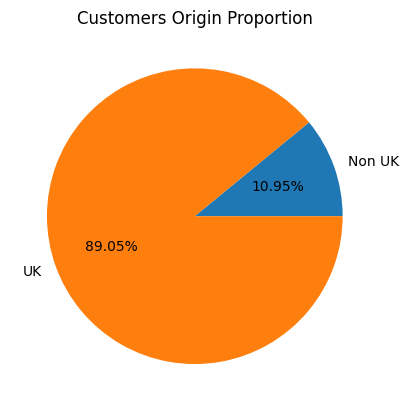

In [ ]:
# Simplify country origin
df['Country_isUK'] = np.where(df['Country']=='United Kingdom', 'UK', 'Non UK')
customers_origin = df.groupby(['Country_isUK']).size()

plt.title('Customers Origin Proportion')
plt.pie(
    customers_origin,
    labels=customers_origin.index,
    autopct=lambda p: f'{p:.2f}%'
)
plt.show();

Based on the piechart, we could see that mostly our customers are from the UK.

Next, we could analyze the trend of purchasement. First, lets create `TotalAmount` column (`Quantity` * `UnitPrice`). Then, we could transform the `InvoiceDate` data type from string to date.

In [ ]:
# Create new features and cast date column
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Country_isUK,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,UK,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,UK,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,UK,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,UK,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,UK,20.34


Then plot the trendline.

In [ ]:
import matplotlib.dates as mdates

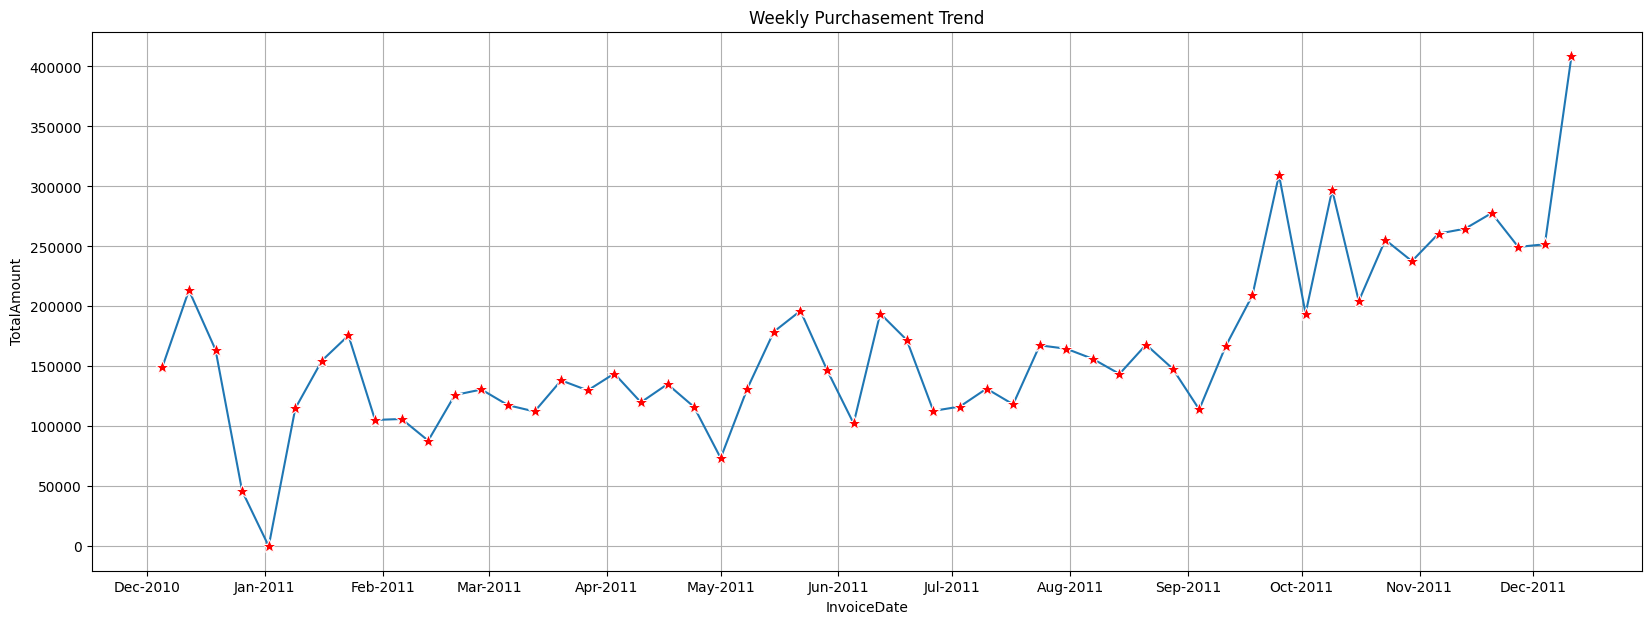

In [ ]:
# Plot weekly trend
weekly_purchasements = df.copy()
weekly_purchasements = weekly_purchasements.groupby(
    by=pd.Grouper(key="InvoiceDate", freq="1W"))["TotalAmount"].sum()

plt.figure(figsize=(20, 7))
plt.title('Weekly Purchasement Trend')
ax = sns.lineplot(
    x=weekly_purchasements.index,
    y=weekly_purchasements,
    marker='*',
    markersize=10,
    markerfacecolor='red'
)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.grid()
plt.show();

In [ ]:
weekly_purchasements

InvoiceDate
2010-12-05    149386.330
2010-12-12    213447.720
2010-12-19    163770.730
2010-12-26     46109.110
2011-01-02         0.000
2011-01-09    114865.270
2011-01-16    154714.940
2011-01-23    175757.980
2011-01-30    105288.770
2011-02-06    106095.230
2011-02-13     88015.420
2011-02-20    126050.400
2011-02-27    130687.360
2011-03-06    117600.820
2011-03-13    112338.000
2011-03-20    138278.820
2011-03-27    129918.430
2011-04-03    143977.030
2011-04-10    119961.920
2011-04-17    135142.201
2011-04-24    116090.020
2011-05-01     73474.560
2011-05-08    131329.180
2011-05-15    178850.250
2011-05-22    196269.920
2011-05-29    146976.900
2011-06-05    102371.900
2011-06-12    194019.080
2011-06-19    171940.300
2011-06-26    112818.820
2011-07-03    116479.920
2011-07-10    131383.740
2011-07-17    118297.880
2011-07-24    167519.810
2011-07-31    164667.901
2011-08-07    156185.190
2011-08-14    143652.210
2011-08-21    168080.690
2011-08-28    148051.260
2011-09-04   

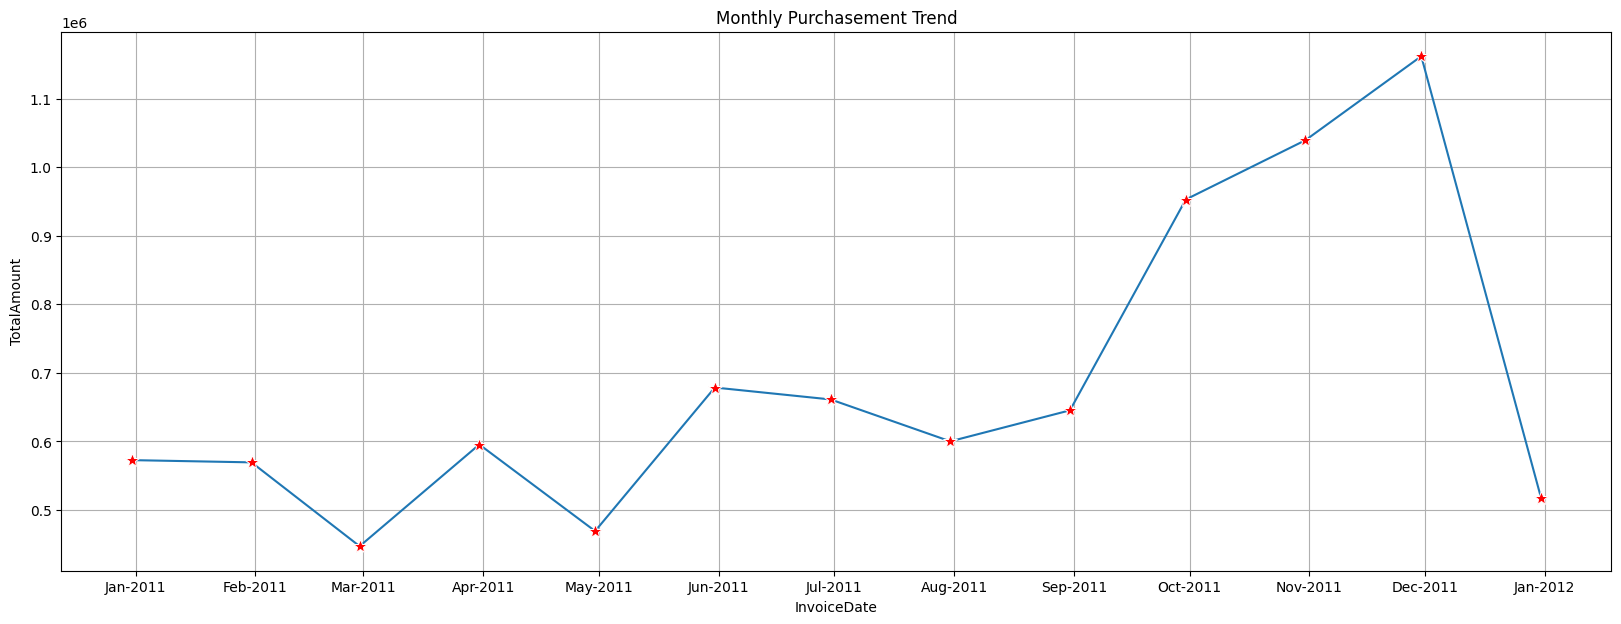

In [ ]:
# Plot monthly trend
monthly_purchasements = df.copy()
monthly_purchasements = monthly_purchasements.groupby(
    by=pd.Grouper(key="InvoiceDate", freq="1M"))["TotalAmount"].sum()

plt.figure(figsize=(20, 7))
plt.title('Monthly Purchasement Trend')
ax = sns.lineplot(
    x=monthly_purchasements.index,
    y=monthly_purchasements,
    marker='*',
    markersize=10,
    markerfacecolor='red'
)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.grid()
plt.show();

Based on the picture above, it can be seen that there was an increase in total purchases at the end of the year.

## RFM

In this project, we would segment the customers using customer's demography and purchasement behavior. To explain the customer's demography, we could use `Country` column while to explain the customer's purchasement behavior we have to transform our data first to get those information. We could use RFM analysis to get those information.

### Recency

To measure customer's recency, we could substract the latest transaction date in the data with each customer's latest transaction.

In [ ]:
recency = df.groupby(['CustomerID'])['InvoiceDate'].max()
recency.head(10)

CustomerID
12346.0   2011-01-18 10:01:00
12347.0   2011-12-07 15:52:00
12348.0   2011-09-25 13:13:00
12349.0   2011-11-21 09:51:00
12350.0   2011-02-02 16:01:00
12352.0   2011-11-03 14:37:00
12353.0   2011-05-19 17:47:00
12354.0   2011-04-21 13:11:00
12355.0   2011-05-09 13:49:00
12356.0   2011-11-17 08:40:00
Name: InvoiceDate, dtype: datetime64[ns]

In [ ]:
max(recency)

Timestamp('2011-12-09 12:50:00')

In [ ]:
recency = max(recency) - recency
recency.head(10)

CustomerID
12346.0   325 days 02:49:00
12347.0     1 days 20:58:00
12348.0    74 days 23:37:00
12349.0    18 days 02:59:00
12350.0   309 days 20:49:00
12352.0    35 days 22:13:00
12353.0   203 days 19:03:00
12354.0   231 days 23:39:00
12355.0   213 days 23:01:00
12356.0    22 days 04:10:00
Name: InvoiceDate, dtype: timedelta64[ns]

In [ ]:
# Get customer's recency
recency = df.groupby(['CustomerID'])['InvoiceDate'].max()
recency = max(recency) - recency
recency = recency.dt.days
recency = recency.rename('Recency')

recency.head()

CustomerID
12346.0    325
12347.0      1
12348.0     74
12349.0     18
12350.0    309
Name: Recency, dtype: int64

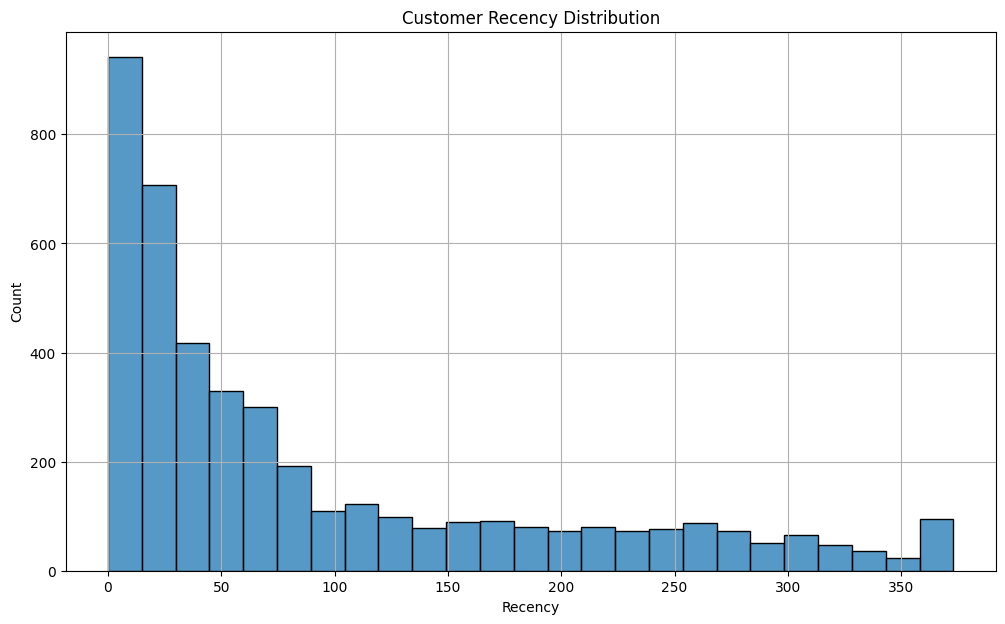

In [ ]:
# Recency histogram plot
plt.figure(figsize=(12, 7))
sns.histplot(recency)
plt.title('Customer Recency Distribution')
plt.grid()
plt.show()

### Frequency

To measure customer's frequency, we could count customer's invoice.

In [ ]:
# Count frequency
frequency = df.groupby(['CustomerID'])['InvoiceNo'].count()
frequency = frequency.rename('Frequency')
frequency.head()

CustomerID
12346.0      1
12347.0    182
12348.0     31
12349.0     73
12350.0     17
Name: Frequency, dtype: int64

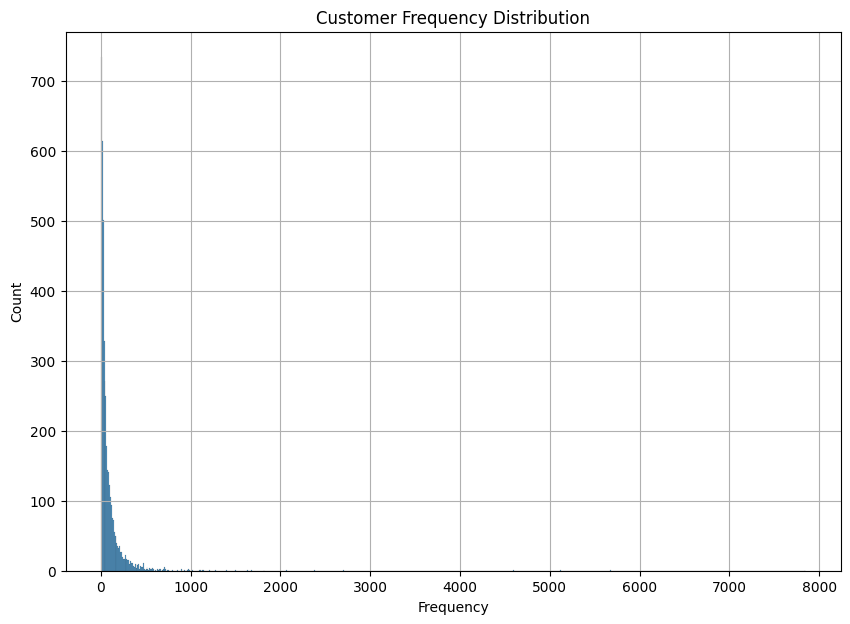

In [ ]:
# Frequency histogram plot
plt.figure(figsize=(10, 7))
plt.title('Customer Frequency Distribution')
sns.histplot(frequency)
plt.grid()
plt.show();

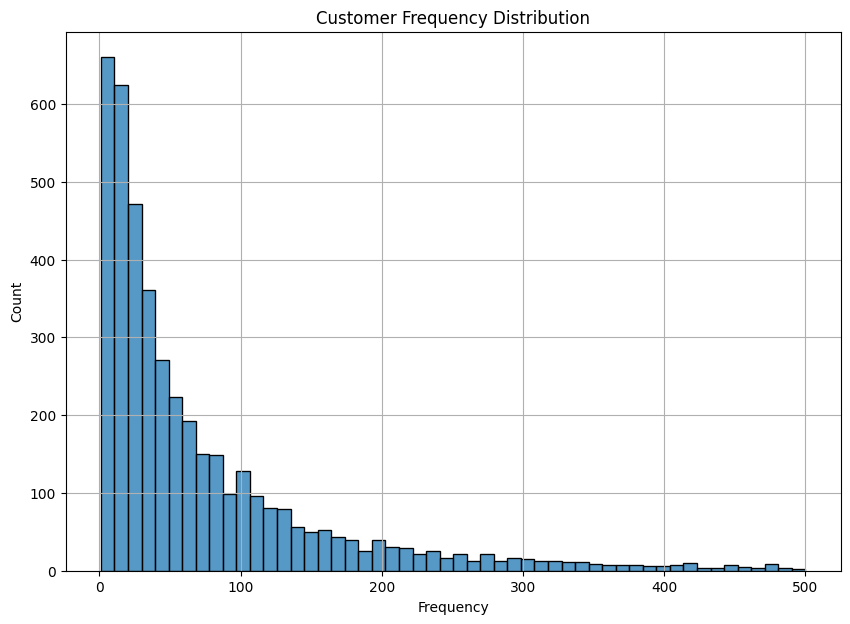

In [ ]:
# Frequency histogram plot
plt.figure(figsize=(10, 7))
plt.title('Customer Frequency Distribution')
sns.histplot(frequency[frequency <= 500])
plt.grid()
plt.show();

Text(0.5, 1.0, 'Frequency <= 500')

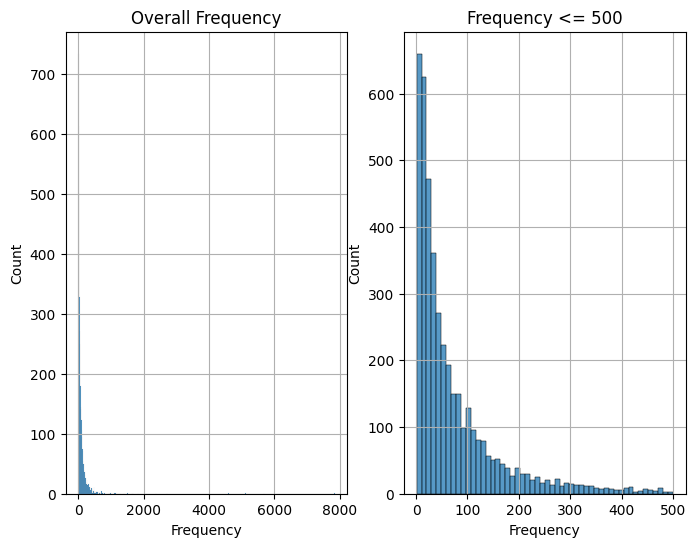

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(8, 6))
sns.histplot(frequency, ax=axs[0])
sns.histplot(frequency[frequency <= 500], ax=axs[1])

axs[0].grid()
axs[0].set_title('Overall Frequency')

axs[1].grid()
axs[1].set_title('Frequency <= 500')

In [ ]:
frequency.head()

CustomerID
12346.0      1
12347.0    182
12348.0     31
12349.0     73
12350.0     17
Name: Frequency, dtype: int64

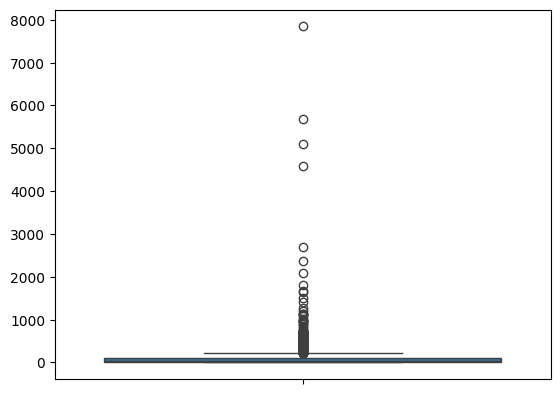

In [ ]:
sns.boxplot(frequency.values);

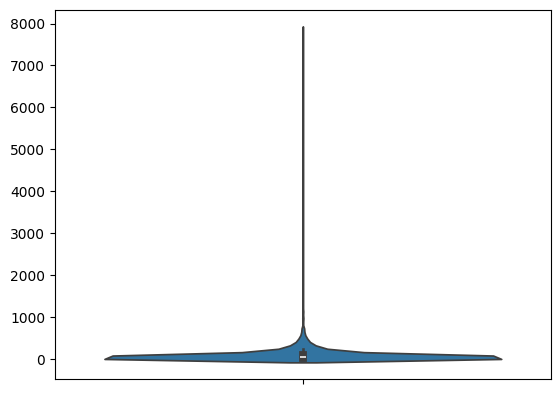

In [ ]:
sns.violinplot(frequency.values);

### Monetary

To measure customer's monetary, we could sum the customer's total purchasements.

In [ ]:
# Sum the money spent
monetary = df.groupby(['CustomerID'])['TotalAmount'].sum()
monetary = monetary.rename('Monetary')
monetary.head()

CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
Name: Monetary, dtype: float64

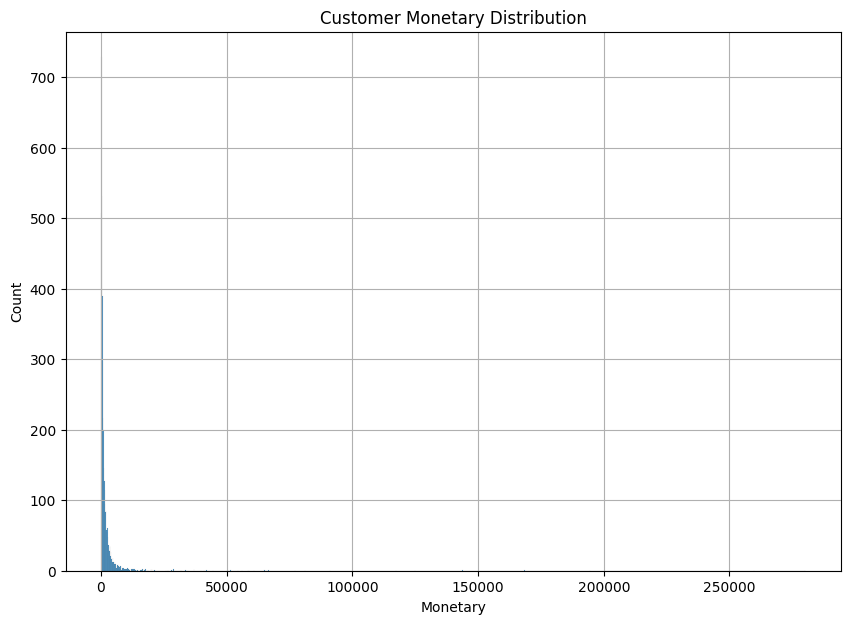

In [ ]:
# Monetary histogram plot
plt.figure(figsize=(10, 7))
plt.title('Customer Monetary Distribution')
sns.histplot(monetary)
plt.grid()
plt.show()

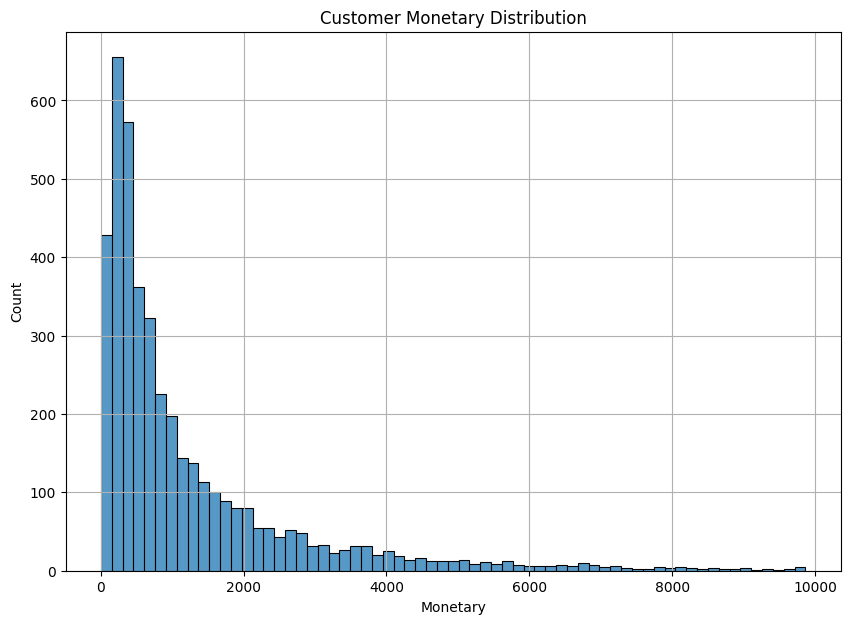

In [ ]:
plt.figure(figsize=(10, 7))
plt.title('Customer Monetary Distribution')
sns.histplot(monetary[monetary < 10000])
plt.grid()
plt.show()

### Merge the Data

The data could be separated into two dataframes. The first dataframe (log transformed data) supposed to be used when modeling and the second one (without log transformation) could be used when visualize the result.

In [ ]:
(
    df
    .groupby(['CustomerID', 'Country_isUK'])
    .size()
    .reset_index()
    .drop(0, axis=1)
)

,CustomerID,Country_isUK
0,12346.0,UK
1,12347.0,Non UK
2,12348.0,Non UK
3,12349.0,Non UK
4,12350.0,Non UK
5,12352.0,Non UK
6,12353.0,Non UK
7,12354.0,Non UK
8,12355.0,Non UK
9,12356.0,Non UK


In [ ]:
df.groupby(['CustomerID', 'Country_isUK']).size()

CustomerID  Country_isUK
12346.0     UK                 1
12347.0     Non UK           182
12348.0     Non UK            31
12349.0     Non UK            73
12350.0     Non UK            17
12352.0     Non UK            85
12353.0     Non UK             4
12354.0     Non UK            58
12355.0     Non UK            13
12356.0     Non UK            59
12357.0     Non UK           131
12358.0     Non UK            19
12359.0     Non UK           248
12360.0     Non UK           129
12361.0     Non UK            10
12362.0     Non UK           266
12363.0     Non UK            23
12364.0     Non UK            85
12365.0     Non UK            22
12367.0     Non UK            11
12370.0     Non UK           167
12371.0     Non UK            63
12372.0     Non UK            52
12373.0     Non UK            14
12374.0     Non UK            33
12375.0     Non UK            17
12377.0     Non UK            77
12378.0     Non UK           219
12379.0     Non UK            40
12380.0     Non UK

In [ ]:
# Get customer's country of origin
country = (
    df
    .groupby(['CustomerID', 'Country_isUK'])
    .size()
    .reset_index()
    .drop(0, axis=1)
)

# Merge the data
df_new = (
    country
    .merge(recency, on='CustomerID')
    .merge(frequency, on='CustomerID')
    .merge(monetary, on='CustomerID')
)

# Set CustomerID as index
df_new = df_new.set_index('CustomerID')
df_new.head(20)

,Country_isUK,Recency,Frequency,Monetary
CustomerID,,,,
12346.0,UK,325,1,77183.60
12347.0,Non UK,1,182,4310.00
12348.0,Non UK,74,31,1797.24
12349.0,Non UK,18,73,1757.55
12350.0,Non UK,309,17,334.40
12352.0,Non UK,35,85,2506.04
12353.0,Non UK,203,4,89.00
12354.0,Non UK,231,58,1079.40
12355.0,Non UK,213,13,459.40


### One Hot Encoding

Since our model could just accept the numeric value, we have to recode the non numeric column.

In [ ]:
# Recode the non numeric variable

df_new = pd.get_dummies(
    df_new,
    columns=['Country_isUK'],
    drop_first=True
)

df_new = df_new.rename(
    columns={'Country_isUK_UK': 'Country_UK'}
)

df_new.head()

,Recency,Frequency,Monetary,Country_UK
CustomerID,,,,
12346.0,325,1,77183.60,True
12347.0,1,182,4310.00,False
12348.0,74,31,1797.24,False
12349.0,18,73,1757.55,False
12350.0,309,17,334.40,False


### Scaling

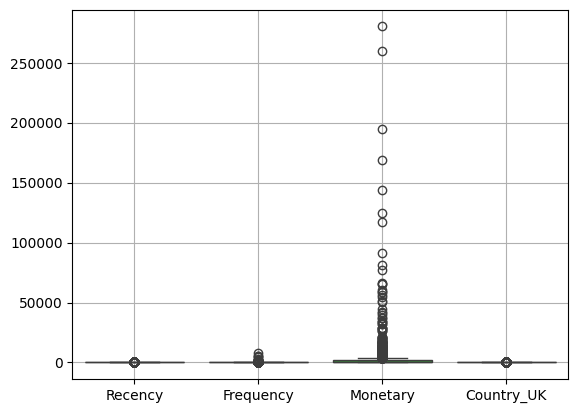

In [ ]:
sns.boxplot(data=df_new)
plt.grid()
plt.show()

As we could see, there are variation of range in each column. We have to standardize it first.

In [ ]:
# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_new)

df_scaled = pd.DataFrame(
    df_scaled,
    columns=df_new.columns,
    index=df_new.index
)

df_scaled.head()

,Recency,Frequency,Monetary,Country_UK
CustomerID,,,,
12346.0,2.334574,-0.396578,8.358668,0.326547
12347.0,-0.905340,0.394649,0.250966,-3.062350
12348.0,-0.175360,-0.265435,-0.028596,-3.062350
12349.0,-0.735345,-0.081836,-0.033012,-3.062350
12350.0,2.174578,-0.326635,-0.191347,-3.062350


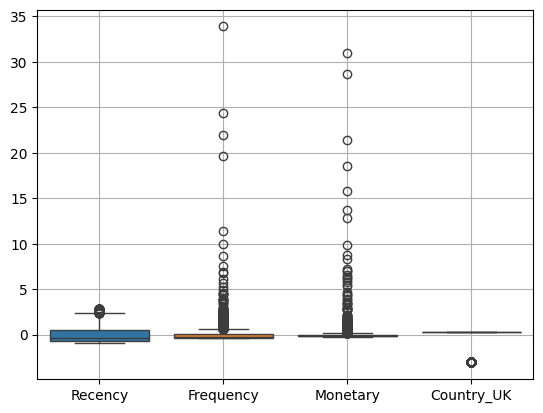

In [ ]:
# Plot scaled data
sns.boxplot(data=df_scaled)
plt.grid()
plt.show()

## Modeling

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Modeling
possible_k = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette = []

for k in possible_k:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_scaled)
    silhouette.append(silhouette_score(X=df_scaled, labels=kmeans.labels_))

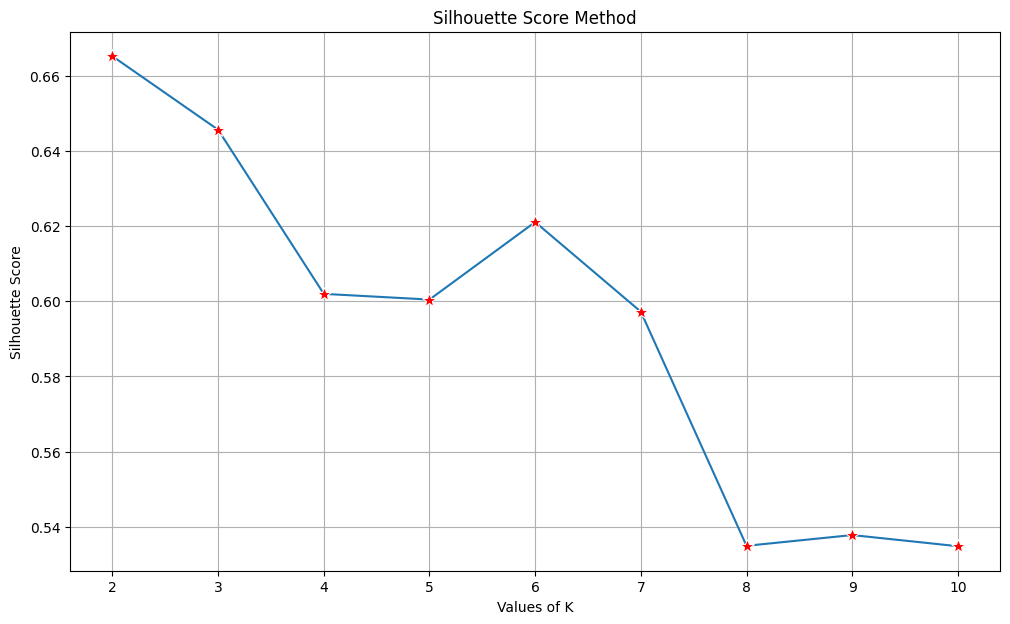

In [ ]:
# Plot the score
plt.figure(figsize=(12, 7))
sns.lineplot(
    x=possible_k,
    y=silhouette,
    marker='*',
    markersize=10,
    markerfacecolor='red'
)
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.grid()
plt.show();

Using silhouette score, the best K is either 2 or 6

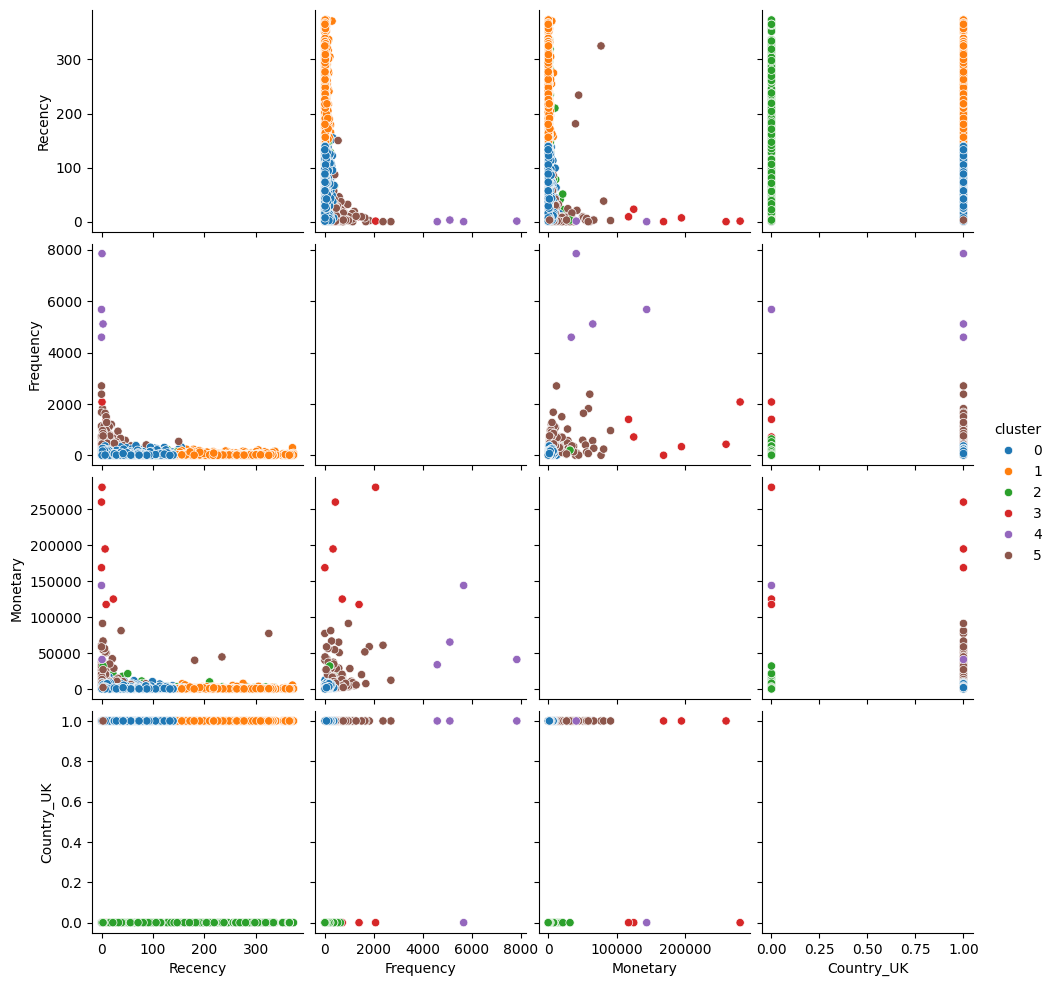

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=42).fit(df_scaled)

df_result_kmeans = df_new.copy()
df_result_kmeans['cluster'] = kmeans.labels_

sns.pairplot(
    data=df_result_kmeans,
    hue='cluster',
    diag_kind='None',
    palette='tab10'
)

plt.show();

In [ ]:
# Quantile function
def q25(x):
    return x.quantile(0.25)

def q75(x):
    return x.quantile(0.75)

# Simple descriptive statistic
(
    df_result_kmeans
    .drop("Country_UK", axis = 1)
    .groupby('cluster')
    .aggregate(['mean', 'std', 'min', q25, 'median', q75, 'max'])
    .transpose()
)

cluster                      0            1             2              3  \
Recency   mean       42.676884   246.776618     95.405797       6.666667   
          std        36.313016    65.636727    104.638705       8.869423   
          min         0.000000   143.000000      0.000000       0.000000   
          q25        14.000000   189.000000     18.000000       0.250000   
          median     31.000000   242.000000     52.000000       4.000000   
          q75        64.000000   296.000000    136.500000       8.500000   
          max       155.000000   373.000000    373.000000      23.000000   
Frequency mean       76.270826    27.689979     81.396135     826.833333   
          std        74.030983    32.176026     96.304061     771.620481   
          min         1.000000     1.000000      1.000000       3.000000   
          q25        22.000000     8.250000     21.250000     360.500000   
          median     51.000000    18.000000     45.000000     572.500000   
          q75       107.000000    33.000000    101.000000    1228.500000   
          max       385.000000   297.000000    638.000000    2076.000000   
Monetary  mean     1341.293935   450.793070   2262.538913  190863.461667   
          std      1592.871914   610.367153   3479.689136   67791.993010   
          min         6.200000     3.750000     51.560000  117379.630000   
          q25       371.700000   163.225000    459.650000  135804.022500   
          median    795.120000   305.515000   1025.700000  181511.645000   
          q75      1720.300000   505.542500   2659.962500  243380.672500   
          max     17654.540000  7832.470000  31906.820000  280206.020000   

cluster                       4             5  
Recency   mean         1.000000     15.234973  
          std          1.414214     35.305176  
          min          0.000000      0.000000  
          q25          0.000000      2.000000  
          median       0.500000      6.000000  
          q75          1.500000     16.000000  
          max          3.000000    325.000000  
Frequency mean      5807.000000    535.360656  
          std       1429.730044    358.078267  
          min       4595.000000      1.000000  
          q25       4982.000000    367.000000  
          median    5393.000000    450.000000  
          q75       6218.000000    589.500000  
          max       7847.000000   2700.000000  
Monetary  mean     70925.287500  13085.065738  
          std      50424.336433  16313.461152  
          min      33719.730000   1093.650000  
          q25      39173.610000   4014.945000  
          median   53078.180000   6923.130000  
          q75      84829.857500  13213.210000  
          max     143825.060000  91062.380000

In [ ]:
df_result_kmeans.head(20)

,Recency,Frequency,Monetary,Country_UK,cluster
CustomerID,,,,,
12346.0,325,1,77183.60,True,5
12347.0,1,182,4310.00,False,2
12348.0,74,31,1797.24,False,2
12349.0,18,73,1757.55,False,2
12350.0,309,17,334.40,False,2
12352.0,35,85,2506.04,False,2
12353.0,203,4,89.00,False,2
12354.0,231,58,1079.40,False,2
12355.0,213,13,459.40,False,2


In [ ]:
df.CustomerID.nunique()

4338

In [ ]:
df_result_kmeans.groupby(["cluster", "Country_UK"])["Recency"].count()

cluster  Country_UK
0        True          2773
1        True           958
2        False          414
3        False            3
         True             3
4        False            1
         True             3
5        True           183
Name: Recency, dtype: int64

In [ ]:
df_result_kmeans.groupby(["cluster", "Country_UK"])["Frequency"].count()

cluster  Country_UK
0        True          2773
1        True           958
2        False          414
3        False            3
         True             3
4        False            1
         True             3
5        True           183
Name: Frequency, dtype: int64

That's it! The customer's behavior really segmented by their country of origin.

What if we separate the customer by its country of origin before doing cluster analysis?

In [ ]:
df_result_kmeans.Recency.quantile([0.25, 0.5, 0.75])

0.25     17.0
0.50     50.0
0.75    141.0
Name: Recency, dtype: float64

In [ ]:
def rqs(recency_score):
  if recency_score < 17:
    return "High_R"
  elif 17 <= recency_score < 50:
    return "Medium_R"
  elif 50 <= recency_score < 141:
    return "Low_R"
  else:
    return "Bad_R"

df_result_kmeans["Recency_Quality"] = df_result_kmeans['Recency'].apply(rqs)
df_result_kmeans.head(20)

,Recency,Frequency,Monetary,Country_UK,cluster,Recency_Quality
CustomerID,,,,,,
12346.0,325,1,77183.60,True,5,Bad_R
12347.0,1,182,4310.00,False,2,High_R
12348.0,74,31,1797.24,False,2,Low_R
12349.0,18,73,1757.55,False,2,Medium_R
12350.0,309,17,334.40,False,2,Bad_R
12352.0,35,85,2506.04,False,2,Medium_R
12353.0,203,4,89.00,False,2,Bad_R
12354.0,231,58,1079.40,False,2,Bad_R
12355.0,213,13,459.40,False,2,Bad_R


In [ ]:
df_result_kmeans["Recency_Quality"].value_counts()

Recency_Quality
Low_R       1092
Medium_R    1092
Bad_R       1088
High_R      1066
Name: count, dtype: int64

In [ ]:
# recency_quatile_scoring: rqs
def rqs_if_else(recency_score):
  if recency_score < 17:
    return "High_R"
  elif 17 <= recency_score < 50:
    return "Medium_R"
  elif 50 <= recency_score < 141:
    return "Low_R"
  else:
    return "Bad_R"

In [ ]:
%timeit df_result_kmeans['Recency'].apply(rqs_if_else)

1.54 ms ± 344 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
import numpy as np

def rqs_np(recency_score):
    thresholds = [17, 50, 141]
    labels = ["High_R", "Medium_R", "Low_R", "Bad_R"]
    return labels[np.digitize(recency_score, thresholds, right=True)]

In [ ]:
%timeit df_result_kmeans['Recency'].apply(rqs_np)

24 ms ± 627 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
data_recency = df_result_kmeans['Recency'].values

In [ ]:
%%timeit
np.apply_along_axis(rqs, axis=0, arr=data_recency.reshape(1,-1))

29.5 ms ± 1.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
pd.Series(np.apply_along_axis(rqs, axis=0, arr=data_recency.reshape(1,-1))).value_counts()

Low_R    1092
Mediu    1092
Bad_R    1088
High_    1066
Name: count, dtype: int64

In [ ]:
np.apply_along_axis(rqs, axis=0, arr=data_recency.reshape(1,-1))

array(['Bad_R', 'High_', 'Low_R', ..., 'High_', 'High_', 'Mediu'],
      dtype='<U5')

# Question

##1.&nbsp;(30 point)
Lakukan EDA lebih mendalam dari data yang tersedia. Misalnya:
<br>
a. Siapa top 5 customer dengan pembelian terbanyak?
<br>
b. Kapan waktu pembelian dengan jumlah customer terbanyak?
(Misal hari apa, jam berapa, bulan apa, minggu ke berapa, dst).<br>
EDA juga bisa dilakukan menggunakan business question lain.

In [ ]:
# Menghitung total pembelian untuk setiap pelanggan
#Pada proses EDA di atas kita sudah mebuat sebuat kolom TotalAmount (kolom quantity x kolom unitprice)
#kolom totalamount akan saya gunakan unutk menampilkan top 5 pelanggan.
total_pembelian_pelanggan = df.groupby('CustomerID')['TotalAmount'].sum()
# Mengurutkan total pembelian dan mengambil 5 pelanggan teratas
top_5_pelanggan = total_pembelian_pelanggan.nlargest(5)
# Menampilkan top 5 pelanggan
print("Top 5 Pelanggan dengan Pembelian Terbanyak berdasarkan kolom TotalAmount :")
print(top_5_pelanggan)


Top 5 Pelanggan dengan Pembelian Terbanyak berdasarkan kolom TotalAmount :
CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
Name: TotalAmount, dtype: float64


In [ ]:
# Konversi kolom InvoiceDate ke tipe data datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# b. Waktu pembelian dengan jumlah customer terbanyak
# Hitung jumlah customer per hari, jam, bulan, minggu
pelanggan_per_hari = df.groupby(df['InvoiceDate'].dt.date)['CustomerID'].nunique()
pelanggan_per_jam_menit = df.groupby([df['InvoiceDate'].dt.hour, df['InvoiceDate'].dt.minute])['CustomerID'].nunique()

# Mendapatkan informasi minggu dalam tahun
df['YearWeek'] = df['InvoiceDate'].dt.isocalendar().week

# Menghitung jumlah pelanggan unik per minggu
pelanggan_per_minggu = df.groupby('YearWeek')['CustomerID'].nunique()

# Minggu dengan jumlah customer terbanyak
minggu_terbanyak_pelanggan = pelanggan_per_minggu.idxmax()
print("Jumlah Pelanggan Terbanyak ada di minggu ke - :", minggu_terbanyak_pelanggan)

# Hari dengan jumlah customer terbanyak
hari_terbanyak_pelanggan = pelanggan_per_hari.idxmax()
print("di tanggal :", hari_terbanyak_pelanggan)

# Jam dan menit dengan jumlah customer terbanyak
jam_menit_terbanyak_pelanggan = pelanggan_per_jam_menit.idxmax()
print("dan di jam:", jam_menit_terbanyak_pelanggan[0], ":", jam_menit_terbanyak_pelanggan[1])

Jumlah Pelanggan Terbanyak ada di minggu ke - : 48
di tanggal : 2011-11-17
dan di jam: 12 : 21


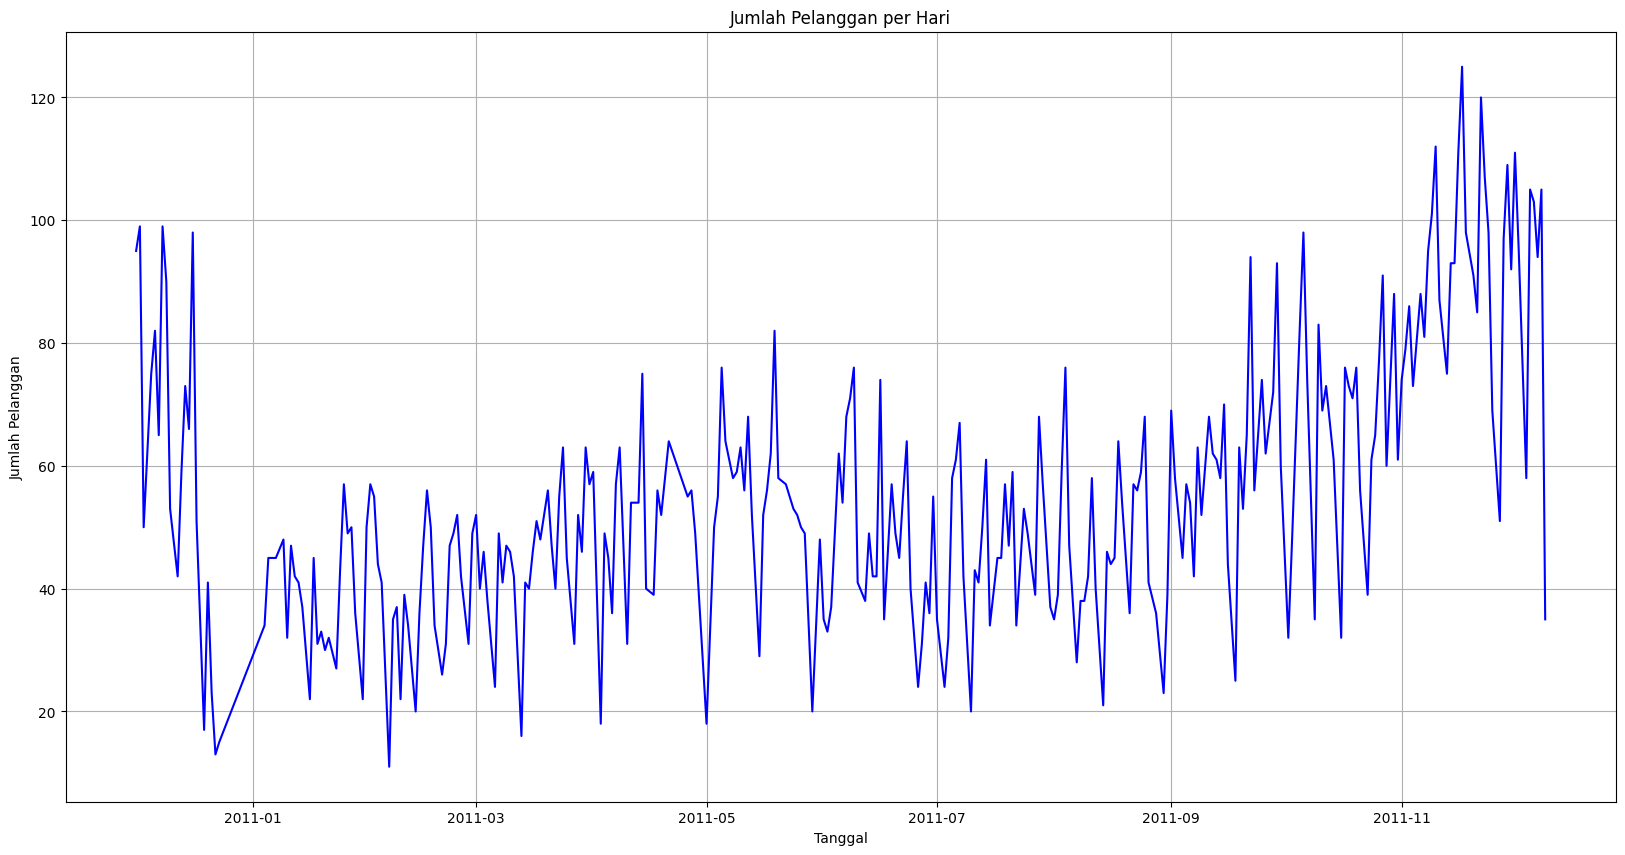

In [ ]:
# Grafik Jumlah Pelanggan per Hari
plt.figure(figsize=(20, 10))
pelanggan_per_hari.plot(kind='line', color='blue')
plt.title('Jumlah Pelanggan per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pelanggan')
plt.grid(True)
plt.show()


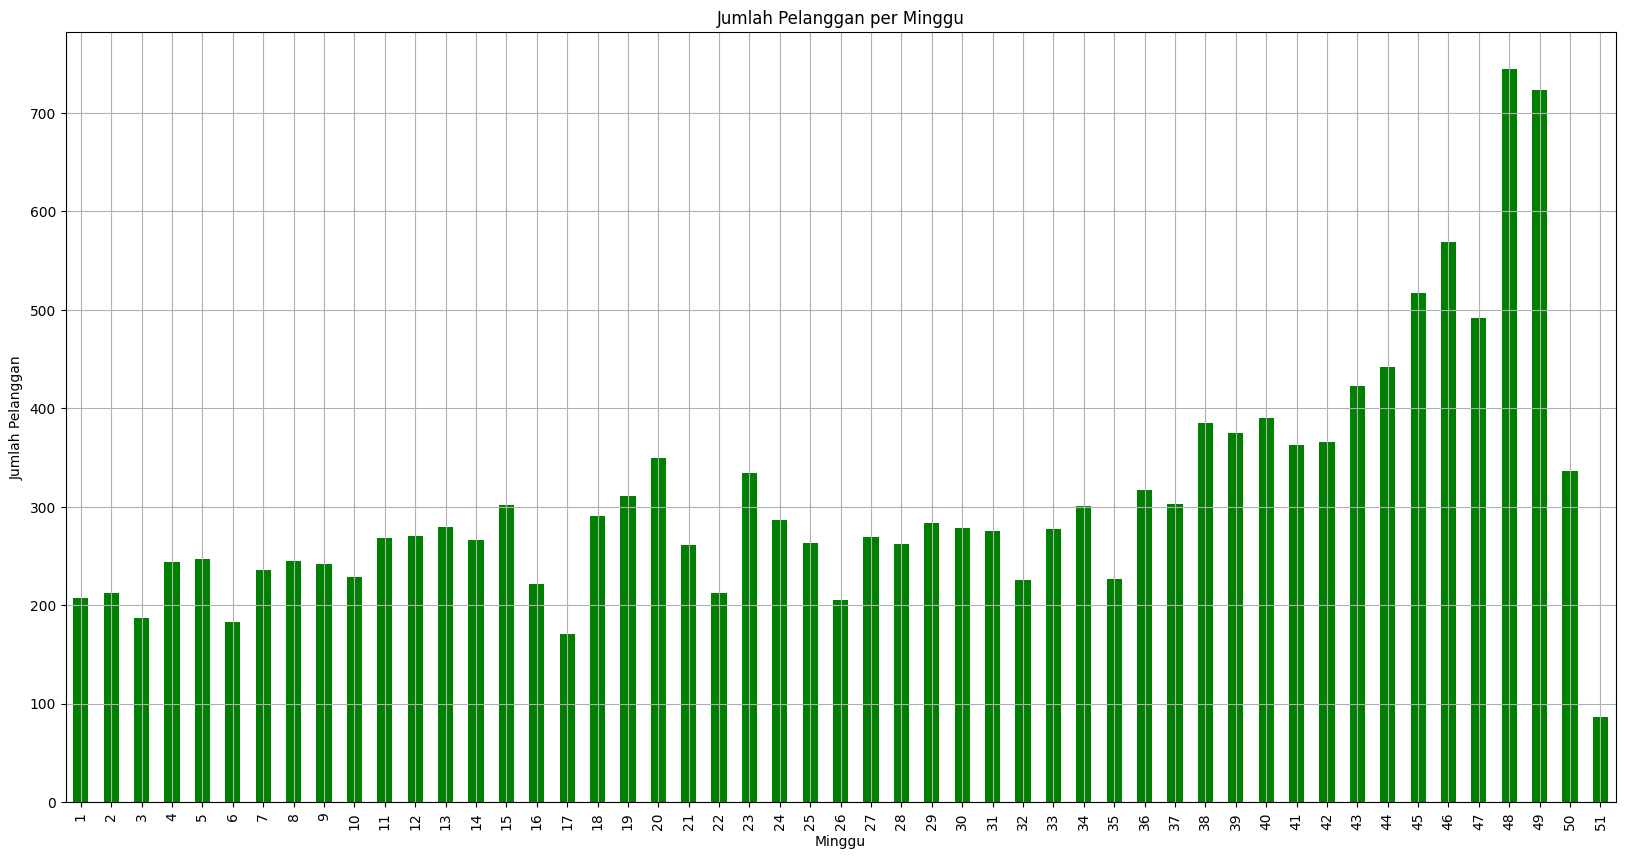

In [ ]:
# Grafik Jumlah Pelanggan per Minggu
plt.figure(figsize=(20, 10))
pelanggan_per_minggu.plot(kind='bar', color='green')
plt.title('Jumlah Pelanggan per Minggu')
plt.xlabel('Minggu')
plt.ylabel('Jumlah Pelanggan')
plt.grid(True)
plt.show()


##2.&nbsp;(30 point)
<br>
a. Apa karakteristik/ciri utama dari masing-masing cluster?<br>
b. Rekomendasikan promo apa yang kira-kira cocok untuk
diberikan ke masing-masing cluster?

dilihat dari deskripsi statistika diatas maka:<br>
a. Karakteristik/Ciri Utama dari Masing-Masing Cluster:

Cluster 0:
- **Recency (days):** Rata-rata pembelian terakhir sekitar 42.68 hari yang lalu dengan variasi yang cukup rendah.
- **Frequency:** Frekuensi pembelian rata-rata sebesar 76.27 dengan variasi yang cukup tinggi.
- **Monetary:** Total belanja rata-rata sebesar 1341.29 dengan variasi yang cukup tinggi.

Cluster 1:
- **Recency (days):** Rata-rata pembelian terakhir sekitar 246.78 hari yang lalu dengan variasi yang sedang.
- **Frequency:** Frekuensi pembelian rata-rata sebesar 27.69 dengan variasi yang sedang.
- **Monetary:** Total belanja rata-rata sebesar 450.79 dengan variasi yang sedang.

Cluster 2:
- **Recency (days):** Rata-rata pembelian terakhir sekitar 95.41 hari yang lalu dengan variasi yang tinggi.
- **Frequency:** Frekuensi pembelian rata-rata sebesar 81.40 dengan variasi yang tinggi.
- **Monetary:** Total belanja rata-rata sebesar 2262.54 dengan variasi yang tinggi.

Cluster 3:
- **Recency (days):** Rata-rata pembelian terakhir sekitar 6.67 hari yang lalu dengan variasi yang rendah.
- **Frequency:** Frekuensi pembelian rata-rata sebesar 826.83 dengan variasi yang tinggi.
- **Monetary:** Total belanja rata-rata sebesar 190863.46 dengan variasi yang tinggi.

Cluster 4:
- **Recency (days):** Rata-rata pembelian terakhir sekitar 1.00 hari yang lalu dengan variasi yang rendah.
- **Frequency:** Frekuensi pembelian rata-rata sebesar 5807.00 dengan variasi yang sangat tinggi.
- **Monetary:** Total belanja rata-rata sebesar 70925.29 dengan variasi yang tinggi.

Cluster 5:
- **Recency (days):** Rata-rata pembelian terakhir sekitar 15.23 hari yang lalu dengan variasi yang cukup rendah.
- **Frequency:** Frekuensi pembelian rata-rata sebesar 535.36 dengan variasi yang sedang.
- **Monetary:** Total belanja rata-rata sebesar 13085.07 dengan variasi yang sedang.

b. Rekomendasi Promo yang Cocok untuk Setiap Cluster:

Cluster 0:
- Diskon spesial untuk pembelian berulang.
- Promo paket bundling untuk meningkatkan frekuensi pembelian.

Cluster 1:
- memberikan diskon dengan tujuan memikat pelanggan agar kembali belanja.
- Program loyalitas untuk meningkatkan frekuensi pembelian.

Cluster 2:
- Penawaran eksklusif untuk pelanggan yang loyal.
- Promo bundling untuk meningkatkan nilai pembelian.

Cluster 3:
- berikan Diskon atau voucher potongan harga untuk pembelian berikutnya.
- Program reward untuk meningkatkan loyalitas pelanggan.

Cluster 4:
- Program diskon eksklusif untuk pelanggan prioritas
- Bonus poin untuk setiap pembelian.

Cluster 5:
- Diskon untuk pembelian yang berulang
- Penawaran harga spesial untuk meningkatkan frekuensi pembelian.

##3.&nbsp;(40 point)<br>
a. Bagaimana jika segmentation difokuskan untuk customer di luar
UK? Apakah terdapat insight yang menarik?<br>
b. Apa karakteristik utama dari cluster-cluster non UK?

In [ ]:
# Filter data untuk menyertakan hanya pelanggan di luar UK
pelanggan_luar_uk = df[df['Country'] != 'United Kingdom']

# Analisis jumlah pelanggan unik di luar UK
jumlah_pelanggan_luar_uk = pelanggan_luar_uk['CustomerID'].nunique()
print(f"Jumlah pelanggan unik di luar UK: {jumlah_pelanggan_luar_uk}")

Jumlah pelanggan unik di luar UK: 418


In [ ]:
# Analisis total pengeluaran pelanggan di luar UK
total_pengeluaran_luar_uk = pelanggan_luar_uk['TotalAmount'].sum()
print(f"Total pengeluaran pelanggan di luar UK: {total_pengeluaran_luar_uk}")

Total pengeluaran pelanggan di luar UK: 1603016.35


In [ ]:
# Analisis rata-rata pengeluaran pelanggan di luar UK
rata2_pengeluaran_luar_uk = pelanggan_luar_uk.groupby('CustomerID')['TotalAmount'].sum().mean()
print(f"Rata-rata pengeluaran pelanggan di luar UK: {rata2_pengeluaran_luar_uk}")

Rata-rata pengeluaran pelanggan di luar UK: 3834.967344497608


In [ ]:
# Analisis kategori produk populer di luar UK
kategori_populer_luar_uk = pelanggan_luar_uk['Description'].value_counts().head(5)
print("Kategori produk paling populer di luar UK:")
print(kategori_populer_luar_uk)

Kategori produk paling populer di luar UK:
Description
POSTAGE                                1072
ROUND SNACK BOXES SET OF4 WOODLAND      301
REGENCY CAKESTAND 3 TIER                297
PLASTERS IN TIN WOODLAND ANIMALS        214
PLASTERS IN TIN CIRCUS PARADE           201
Name: count, dtype: int64


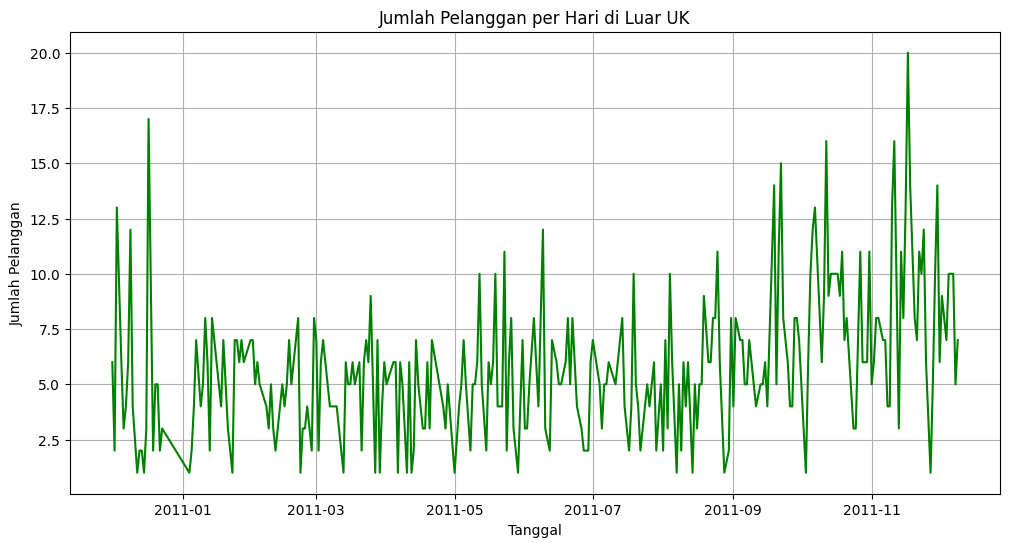

In [ ]:
# Analisis waktu pembelian, Pembelian per hari di luar UK
pelanggan_per_hari_luar_uk = pelanggan_luar_uk.groupby(pelanggan_luar_uk['InvoiceDate'].dt.date)['CustomerID'].nunique()

# Visualisasi jumlah pelanggan per hari di luar UK
plt.figure(figsize=(12, 6))
pelanggan_per_hari_luar_uk.plot(kind='line', color='green')
plt.title('Jumlah Pelanggan per Hari di Luar UK')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pelanggan')
plt.grid(True)
plt.show()

In [ ]:
# Analisis frekuensi pembelian per pelanggan di luar UK
frekuensi_pembelian_luar_uk = pelanggan_luar_uk.groupby('CustomerID')['InvoiceNo'].count().describe()
print(f"Frekuensi pembelian per pelanggan di luar UK:\n{frekuensi_pembelian_luar_uk}")

Frekuensi pembelian per pelanggan di luar UK:
count     418.000000
mean      104.217703
std       313.632715
min         1.000000
25%        22.000000
50%        45.000000
75%       102.500000
max      5675.000000
Name: InvoiceNo, dtype: float64


In [ ]:
# Analisis rata-rata pembelian per pelanggan di luar UK
rata2_pembelian_luar_uk = pelanggan_luar_uk.groupby('CustomerID')['TotalAmount'].mean()
print(f"Rata-rata pembelian per pelanggan di luar UK: {rata2_pembelian_luar_uk.mean()}")

Rata-rata pembelian per pelanggan di luar UK: 36.39205857592468


###a. Berdasarkan hasil analisis pelanggan di luar UK terdapat beberapa insight yang menarik:

- Ada 418 pelanggan unik di luar UK. Jumlah ini menandakan bahwa memiliki basis pelanggan internasional yang cukup luas untuk dianalisis dan dipahami lebih lanjut.
- Total pengeluaran pelanggan di luar UK adalah sekitar 1.603.016,35. Ini menunjukkan bahwa pelanggan internasional memberikan kontribusi yang signifikan terhadap total pendapatan, yang berarti ada potensi pasar internasional yang kuat.
- Rata-rata pengeluaran per pelanggan di luar UK adalah sekitar 3.834,97. Nilai ini menunjukkan bahwa pelanggan internasional cenderung menghabiskan lebih banyak uang per pelanggan dibandingkan dengan beberapa pasar domestik, yang berarti mungkin memiliki pelanggan dengan nilai tinggi di luar UK.
- Produk paling populer di luar UK termasuk kategori POSTAGE, ROUND SNACK BOXES SET OF4 WOODLAND, REGENCY CAKESTAND 3 TIER, PLASTERS IN TIN WOODLAND ANIMALS, dan PLASTERS IN TIN CIRCUS PARADE.
- Permintaan tinggi untuk produk-produk ini menunjukkan bahwa pelanggan internasional memiliki preferensi khusus terhadap beberapa produk tertentu, yang dapat membantu mengarahkan upaya pemasaran dan penjualan pada produk-produk ini untuk meningkatkan penjualan.
- Rata-rata frekuensi pembelian per pelanggan di luar UK adalah sekitar 104,22, dengan nilai berkisar dari 1 hingga 5675. Ini menunjukkan variasi yang signifikan dalam kebiasaan belanja pelanggan di luar UK. Beberapa pelanggan melakukan pembelian dengan frekuensi tinggi, sedangkan yang lain cenderung lebih jarang berbelanja.
- Rata-rata pembelian per pelanggan di luar UK adalah sekitar 36,39. Ini adalah rata-rata pengeluaran per transaksi pelanggan di luar UK.

###b. karakteristik utama dari cluster-cluster non UK:<br>
Cluster Pengeluaran:
- Pengeluaran Tinggi: Cluster dengan pelanggan yang memiliki total pengeluaran tinggi per pelanggan. Biasanya, ini termasuk pelanggan yang menghabiskan banyak uang pada satu transaksi atau secara kumulatif dalam beberapa transaksi.
- Pengeluaran Rendah: Cluster dengan pelanggan yang memiliki total pengeluaran rendah per pelanggan. Mereka mungkin melakukan pembelian dalam jumlah kecil atau tidak sering.

Cluster Frekuensi Pembelian:
- Frekuensi Tinggi: Cluster dengan pelanggan yang berbelanja sangat sering, menunjukkan loyalitas yang kuat terhadap toko atau produk.
- Frekuensi Rendah: Cluster dengan pelanggan yang jarang melakukan pembelian.

Cluster Rata-rata Pembelian:
- Rata-rata Pembelian Tinggi: Cluster dengan pelanggan yang cenderung menghabiskan lebih banyak uang per transaksi.
- Rata-rata Pembelian Rendah: Cluster dengan pelanggan yang menghabiskan jumlah uang yang lebih kecil per transaksi.

Cluster Kategori Produk:
- Produk Tertentu: Cluster dengan pelanggan yang memiliki preferensi kuat terhadap kategori produk tertentu, seperti produk rumah tangga, pakaian, atau mainan.
- Varian Produk: Cluster dengan pelanggan yang memiliki preferensi untuk berbagai jenis produk, menunjukkan minat yang lebih luas dalam produk yang ditawarkan.

Cluster Geografis:
- Wilayah atau Negara: Cluster berdasarkan negara atau wilayah geografis tertentu di luar UK. Pelanggan di wilayah tertentu mungkin memiliki preferensi atau kebutuhan yang berbeda berdasarkan kondisi lokal.
- Zona Waktu: Cluster berdasarkan zona waktu atau periode belanja populer di luar UK.

Cluster Demografis:
- Usia: Cluster berdasarkan kelompok usia, yang dapat menunjukkan perbedaan dalam preferensi belanja dan kebutuhan.
- Jenis Kelamin: Cluster berdasarkan jenis kelamin, yang dapat memberikan wawasan tentang preferensi belanja yang berbeda.

Cluster Saluran Pembelian:
- Saluran Online vs. Offline: Cluster berdasarkan preferensi pelanggan untuk berbelanja online atau offline.
- Metode Pembayaran: Cluster berdasarkan preferensi metode pembayaran, seperti kartu kredit, transfer bank, atau metode pembayaran digital.